# Vaccinal Efficacy Model.

In [1]:
import pandas as pd 

import numpy as np

import math

import matplotlib.pyplot as plt 

from pylab import *

from scipy import integrate 

# Model Description.

In [2]:
#Determine when the placebo starts.
def tempo(t1,t):
    tem=1
    if t<t1:
        tem=0
    return tem
#Normal density function:
def p(t,nu,sigma):
    return  (2/(np.sqrt(2*np.pi)*sigma))*math.exp(-(t-nu)**2 /(2*(sigma)**2))

#Vaccination time or placebo as a normal distribution centered on t1(mean) and variance:
def tempo_n(t1,t):
    return p(t,t1,20)

#Define the system of equations:
def f2(y, t, c1, c2, c3, tp, q, w, nu, sigma):
    S, V, Pl, I, Ip, F, Iv, P= y
    inc = 8*c1*math.exp(-(t-c2)**2/c3)/500000 #INCIDENCE OF THE MODEL.
    return [-nu*S*q*tempo(0,t)-(1-q)*S*nu*tempo(tp,t) -inc*S, q*nu*S*tempo(0,t) - sigma*V,(1-q)*S*nu*tempo(tp,t) - inc*Pl, inc*S,
            inc*Pl,-inc*F + (1-w)*sigma*V, inc*F, w*sigma*V]

# Solve the equations:
#Note: it depends on the time of the study.
def resuelve2(c1, c2, c3, tp): 
    q, w, nu, sigma = 0.5, 0.7, 0.028, 0.1
    y0 = [20000, 0, 0, 0, 1, 0, 1, 0] #Initial conditions.
    t = np.linspace(0, 1095, 1096) #3 years.
    #t = np.linspace(0, 180, 181) #End of study.
    Y = integrate.odeint(f2, y0, t, args=(c1, c2, c3, tp, q, w, nu,sigma))
    return Y

In [3]:
#We assign values to the parameters
c1, c2, c3 = 220, 90 , 1650
 
#We solve the equations.
Y2 = resuelve2(c1,c2,c3,0)

In [4]:
#Compartment names.
col=['Susceptible (S)','Vaccinated (V)','Placebos (Pl)','Infected (I)','Infected placebos (Ip)','Failed (F)',
     'Infected vaccinated (Iv)','Protected (P)']

In [5]:
%matplotlib inline
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider

In [6]:
#Graph each compartment of the model.

@interact_manual( Tipo=widgets.Dropdown(options=col) )
def Modelo_plot2(Tipo):
    
    titulo=Tipo
    i=col.index(titulo)
    
    t = np.linspace(0, 1095, 1096)
    plt.plot(t,Y2[:1096,i])
    grid()
    plt.rcParams['figure.figsize'] = (10,7)
    matplotlib.rcParams.update({'font.size': 22})
    xlabel("Clinical trial time (days)")
    ylabel("Population")
    
    matplotlib.rc('xtick', labelsize=20) 
    matplotlib.rc('ytick', labelsize=20)
    title(titulo)
    
        

interactive(children=(Dropdown(description='Tipo', options=('Susceptible (S)', 'Vaccinated (V)', 'Placebos (Pl…

# Incidencia

In [7]:
#Incidence function on a vector..
def incidencia_2(v,c1,c2,c3):
    w=np.zeros(len(v))
    for i in range(len(v)):
        w[i]= 8*c1*math.exp(-(v[i]-c2)**2/c3)/500000
    return w

Text(0.5, 1.0, '$\\tau$')

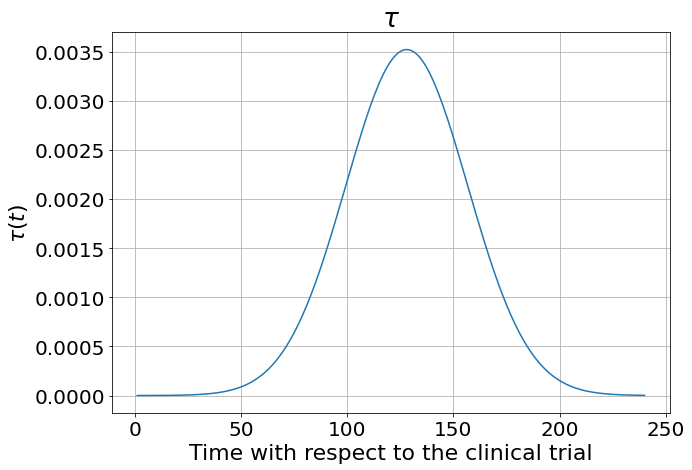

In [29]:
#Graph the incidence function.
s= np.linspace(1, 240, 240)
c1, c2, c3 = 220, 128 , 1650

inc=incidencia_2(s,c1,c2,c3)

plt.plot(s,inc)
grid()

plt.rcParams['figure.figsize'] = (10,7)


matplotlib.rcParams.update({'font.size': 22})
xlabel("Time with respect to the clinical trial")
ylabel(r'$\tau (t)$')

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
title(r'$\tau$')

#savefig("Inc.png")

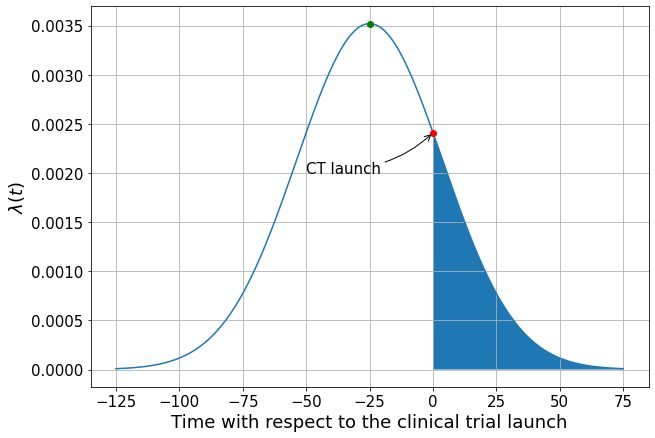

In [16]:
#Incidence function at a point.
def incidencia(t,c1,c2,c3):
    return 8*c1*math.exp(-(t-c2)**2/c3)/500000

#Graph the cumulative incidence:

s= np.linspace(-125, 75, 201)
c1, c2, c3 = 220, -25 , 1650

inc=incidencia_2(s,c1,c2,c3)
X = np.linspace(0,75,100)
Y = incidencia_2(X,c1,c2,c3)

#Designated the coordinates with a green dot.
plt.plot(s,inc)
plt.fill_between(X,Y)
punto = plot(c2,incidencia(c2, c1, c2, c3), 'go')

#plt.plot(s,temP)
grid()

plt.rcParams['figure.figsize'] = (10,7)


matplotlib.rcParams.update({'font.size': 18})
xlabel("Time with respect to the clinical trial launch") 
ylabel("$\lambda (t)$")

px = 0
py = incidencia(0, c1,c2,c3)

# Designated the coordinates with a red dot.
punto = plot([px], [py], 'ro')

# Point with an arrow.
nota = plt.annotate('CT launch',      
         xy=(px, py),
         xycoords='data',
         xytext=(-50, 0.002),
         fontsize=15,
         arrowprops=dict(arrowstyle="->",
         connectionstyle="arc3,rad=.2"))


px2 = 50
py2 = incidencia(50,c1,c2,c3)

# Designated the coordinates with a red dot
#punto = plot([px2], [py2], 'ro')

# Point with an arrow.
#nota = plt.annotate(r'Infected add up to 200',      
#         xy=(px2, py2),
#         xycoords='data',
#         xytext=(17, 0.0015),
#         fontsize=15,
#         arrowprops=dict(arrowstyle="->",
#        connectionstyle="arc3,rad=.2"))


matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
#title('Incidence')

#savefig("Inc_2.png")

# Efficacy Graphs.

In [30]:
from scipy.integrate import quad

#Functions:

def inci_orig(t):
    c1, c2, c3 = 220,128,1650
    return c1*math.exp(-(t-c2)**2/c3)

def prob_den(t,nu,sigma):
    return (1/(np.sqrt(2*np.pi)*sigma))*math.exp(-(t-nu)**2 /(2*(sigma)**2))

def inci_den(t,nu,sigma,c):
    return c*prob_den(t,nu,sigma)

def inci_sample(t,nu,sigma,c):
    const=8/500000
    return const*inci_den(t,nu,sigma,c)

#Calculate the number of infected until you add up to 200 or until the end of the clinical trial.
def suma_2(Y):
    s=0
    k=0
    while (k<200 and s<180):
        s=s+1
        k=Y[s,4]+Y[s,6]
    return s

#Determine the value of the estimated vaccine efficacy.
def eficacia(c1, c2, c3, tp):
    Y =resuelve2(c1, c2, c3, tp)
    n=len(Y[:,3])
    #n=suma_2(Y)+1
    a=Y[n-1,6]
    b=Y[n-1,5]+Y[n-1,7]
    c=Y[n-1,4]
    d=Y[n-1,2]
    rr=(a/c)*((c+d)/(a+b))
    z=1-rr
    return z


In [31]:
#Provides initial values for simulations of vaccine efficacy.

sigma=np.sqrt(1650/2)
c=220*sigma*np.sqrt(2*np.pi)
C2=np.linspace(-20, 125, 146)
n=len(C2)

#Calculation of the integral density.
Id=np.zeros(n)
for k in range(n):
    k=int(k)
    nu=C2[k]
    Id[k]=round(quad(prob_den, 0, np.infty, args=(nu, sigma))[0],4)

#Calculation of the incidence.
Ii=np.zeros(n)
for k in range(n):
    k=int(k)
    nu=C2[k]
    Ii[k]=quad(inci_sample, 0, np.infty, args=(nu, sigma,c))[0]
    
#Calculation of vaccine efficacy in vectors.
efi=np.zeros(n)
for k in range(n):
    k=int(k)
    nu=C2[k]
    efi[k]=round(eficacia(220, nu, 1650,0),4)

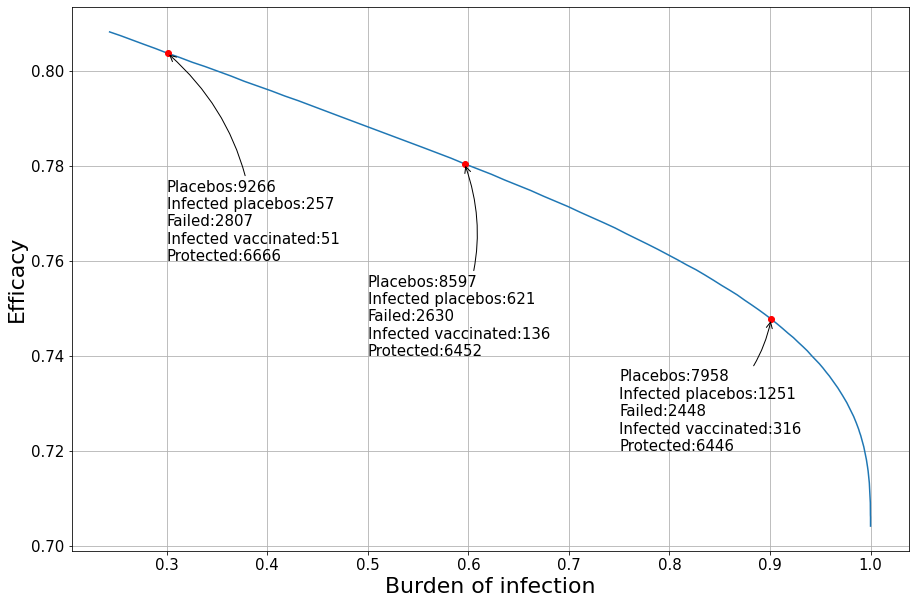

In [16]:
#Plots vaccine efficacy versus burden of infection.
#It presents the values of some compartments in some parts of the graph.

plt.plot(Id,efi)

matplotlib.rcParams.update({'font.size': 22})
xlabel("Burden of infection")
ylabel("Efficacy")

grid()

plt.rcParams['figure.figsize'] = (15,10)

px = 0.3008
indice = np.where(Id == 0.3008)[0]
py =efi[indice]

# We assign values to the parameters:
c1, c3 = 220, 1650

#We solve the equations:
valor = resuelve2(c1,C2[indice],c3,0)
#s=suma_2(valor)
s=len(valor)-1
v1=str(round(valor[s,2]))
v2=str(round(valor[s,4]))
v3=str(round(valor[s,5]))
v4=str(round(valor[s,6]))
v5=str(round(valor[s,7]))

# Designated the coordinates with a red dot
punto = plot([px], [py], 'ro')

# Point with an arrow.
nota = plt.annotate(r'Placebos:' + v1+ '\n' 
                    'Infected placebos:' + v2 + '\n'
                    'Failed:' + v3+'\n' 
                    'Infected vaccinated:' + v4 + '\n'
                    'Protected:' + v5,     
         xy=(px, py),
         xycoords='data',
         xytext=(0.3, 0.76),
         fontsize=15,
         arrowprops=dict(arrowstyle="->",
         connectionstyle="arc3,rad=.2"))


px2 = 0.5963
indice = np.where(Id == 0.5963)[0]
py2 =efi[indice]

# We assign values to the parameters:
c1, c3 = 220, 1650

#We solve the equations:
valor = resuelve2(c1,C2[indice],c3,0)
#s=suma_2(valor)
s=len(valor)-1
v1=str(round(valor[s,2]))
v2=str(round(valor[s,4]))
v3=str(round(valor[s,5]))
v4=str(round(valor[s,6]))
v5=str(round(valor[s,7]))

# Designated the coordinates with a red dot:
punto = plot([px2], [py2], 'ro')

# Point with an arrow.
nota = plt.annotate(r'Placebos:' + v1+ '\n' 
                    'Infected placebos:' + v2 + '\n'
                    'Failed:' + v3+'\n' 
                    'Infected vaccinated:' + v4 + '\n'
                    'Protected:' + v5,     
         xy=(px2, py2),
         xycoords='data',
         xytext=(0.5, 0.74),
         fontsize=15,
         arrowprops=dict(arrowstyle="->",
         connectionstyle="arc3,rad=.2"))

px3 = 0.9012
indice = np.where(Id == 0.9012)[0]
py3 =efi[indice]

# We assign values to the parameters:
c1, c3 = 220, 1650

#We solve the equations:
valor = resuelve2(c1,C2[indice],c3,0)
#s=suma_2(valor)
s=len(valor)-1
v1=str(round(valor[s,2]))
v2=str(round(valor[s,4]))
v3=str(round(valor[s,5]))
v4=str(round(valor[s,6]))
v5=str(round(valor[s,7]))

# Designated the coordinates with a red dot:
punto = plot([px3], [py3], 'ro')

# Point with an arrow.
nota = plt.annotate(r'Placebos:' + v1+ '\n' 
                    'Infected placebos:' + v2 + '\n'
                    'Failed:' + v3+'\n' 
                    'Infected vaccinated:' + v4 + '\n'
                    'Protected:' + v5,     
         xy=(px3, py3),
         xycoords='data',
         xytext=(0.75, 0.72),
         fontsize=15,
         arrowprops=dict(arrowstyle="->",
         connectionstyle="arc3,rad=.2"))


#savefig("burden_E.png")

# Efficiency of several simulations at the same time.

In [47]:
#Efficacy until the end of the study.

def eficacia_2(c1, c2, c3, tp):
    k=len(c2)
    z=np.zeros(k)
    for i in range(k):
        Y =resuelve2(c1, c2[i], c3, tp)
        n=len(Y[:,3])
        a=Y[n-1,6]
        b=Y[n-1,5]+Y[n-1,7]
        c=Y[n-1,4]
        d=Y[n-1,2]
        rr=(a/c)*((c+d)/(a+b))
        z[i]=1-rr
    return z

In [ ]:
# Assign different values of tp and tv to define the different scenarios.

v=np.linspace(-25, 180, 51)
m=len(v)
lim=0.7*np.ones(m)

c2= np.linspace(-25, 180, 206)
c1, c3= 220, 1650
z=np.ones((len(c2),4))
#tp=[20,25,30,35] #tv=30
#tp=[0,5,10,15]#tv=10
tp=[10,15,20,25] #tv=15
#tp=[0,5,10,15] #tv=0

#Calculate the vaccine efficacy for different values of tv and tp at the same time.

for k in range(4):
    z[:,k]=eficacia_2(c1, c2, c3,tp[k])

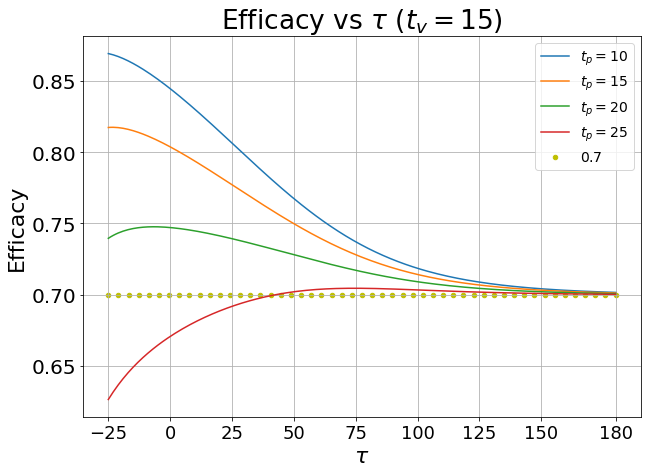

In [57]:
# Vaccine efficacy graph of different times of vaccination and injection of palcebos vs 𝜏.

plt.plot(c2,z[:,0])
plt.plot(c2,z[:,1])
plt.plot(c2,z[:,2])
plt.plot(c2,z[:,3])
plt.scatter(v,lim,c='y', s=20)
#plt.plot(v,lim, color='black')

grid()

plt.rcParams['figure.figsize'] = (10,7)

legend(('$t_{p}=10$','$t_{p}=15$','$t_{p}=20$','$t_{p}=25$', '$0.7$'),
prop = {'size':14}, loc = 'upper right')
matplotlib.rcParams.update({'font.size': 22})
xlabel(r"$\tau$")
ylabel("Efficacy")


plt.xticks([-25,0,25,50,75,100,125,150,180],fontsize=18)


matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
title('Efficacy vs '  r'$\tau$ ($t_{v}=15$)')


#savefig("fig9.png")